# Collaborative Filtering and Recommender Systems

Businesses like Amazon, Netflix, and Hulu want to keep you engaged, and they accomplish this by recommending products you'll likely find interesting.
The more movies and television shows Netflix and Hulu have you watch, the more advertisements you'll watch.
The more products Amazon can find for you, the more likely you are to buy them.

The principle behind how businesses like this are able to recommend products you will like is called **collaborative filtering**.
Collaborative filtering assumes people who consume similar content are likely to have similar preferences.
If this principle is true, it can be exploited.

We will see how K nearest neighbors classification can recommend movies based on a user's past ratings.
The data we will use is from Netflix.
This dataset contains 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users.


## Movie Tags

In [50]:
movies2ids = read.csv('movies.csv')
print(movies2ids[1:5,1:2])
print(dim(movies2ids))

  movieId                              title
1       1                   Toy Story (1995)
2       2                     Jumanji (1995)
3       3            Grumpier Old Men (1995)
4       4           Waiting to Exhale (1995)
5       5 Father of the Bride Part II (1995)
[1] 9742    3


## Ratings

In [72]:
ratings = read.csv("ratings.csv")
print(ratings[1:5,])

  userId movieId rating timestamp
1      1       1      4 964982703
2      1       3      4 964981247
3      1       6      4 964982224
4      1      47      5 964983815
5      1      50      5 964982931


## Data manipulation

In [74]:
library(reshape2)
d = dcast(ratings, userId~movieId, value.var="rating")
d[is.na(d)] = 0
print(dim(d))

rated = ifelse(d>0,1,0)

numRated = apply(rated,1,sum)
d = d[numRated>100,]

numMoviesRated = apply(rated,2,sum)
d = d[,numMoviesRated>100,]

print(dim(d))

[1]  610 9725
[1] 248 135


## KNN model for 1 movie

In [75]:
library(class)

N = ncol(d)
d = d[,2:N]
N = ncol(d)

print(dim(d))

knnModel <- knn(train = d[,2:N]
                ,test = d[,2:N]
                ,cl = d[,1]
                ,k=2)

comparisons = data.frame('prediction'=knnModel,'truth'=d[,1])
print(mean(comparisons$prediction==comparisons$truth))

[1] 248 134
[1] 0.6935484


## Cross-validation

Warning message in split.default(sample(1:numObservations, numObservations), 1:10):
“data length is not a multiple of split variable”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


ERROR: Error in plot.window(...): need finite 'xlim' values


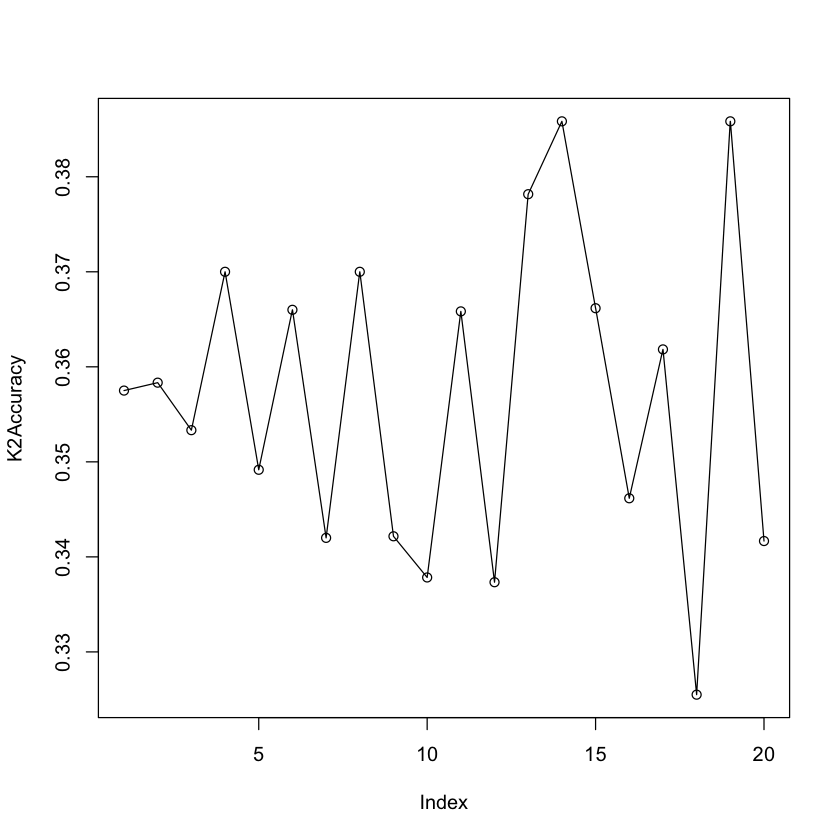

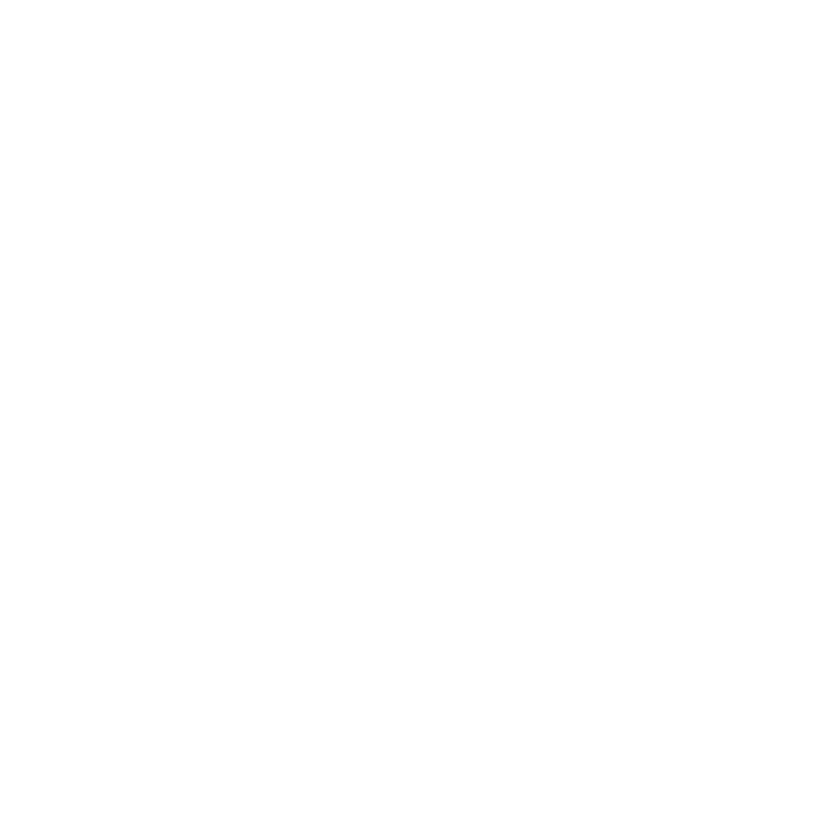

In [76]:
numObservations = nrow(d)
foldIds = split(sample(1:numObservations,numObservations),1:10)

j=1
K2Accuracy = rep(20,0)
for (K in 1:20){
    Accuracy = rep(0,10)
    for (k in 1:length(foldIds)){
        test = d[foldIds[[k]],]
        training = d[-foldIds[[k]],]

        knnModel <- knn(train = training[,setdiff(1:N,j)]
                    ,test = test[,setdiff(1:N,j)]
                    ,cl = training[,j]
                    ,k=2)

        comparisons = data.frame('prediction'=knnModel,'truth'=test[,j])
        Accuracy[k] = mean(comparisons$prediction==comparisons$truth)
    }
    K2Accuracy[K] = mean(Accuracy)
}
plot(K2Accuracy)
plot(lines(K2Accuracy))

## Recommending movies to a user

In [156]:
moviesViewed = ifelse(d>0,1,0)

distances <- as.matrix(dist(moviesViewed, method="euclidean"))

user=10
neighbors = 10
ordered.neighbors <- order(distances[user, ])[2:(neighbors+1)]
ordered.neighbors

movieProbs   = apply(moviesViewed[ordered.neighbors,],2,mean)
movieProbs

sortedMovies = movieProbs[order(movieProbs,decreasing=TRUE)]
top5Movies   = data.frame(sortedMovies[1:5])

movies2ids[movies2ids$movieId %in% as.integer(row.names(top5Movies)),]

[1]  77  64 222 126  88 226   5 158 189 129

1     2     6    10    32    34    39    47    50   110   111   150   153 
  0.1   0.1   0.0   0.0   0.1   0.3   0.1   0.0   0.1   0.0   0.0   0.1   0.0 
  161   165   185   208   223   231   253   260   292   293   296   316   318 
  0.0   0.0   0.0   0.0   0.0   0.0   0.1   0.2   0.0   0.0   0.2   0.0   0.2 
  329   344   349   356   357   364   367   377   380   434   454   457   480 
  0.0   0.1   0.0   0.3   0.0   0.1   0.0   0.0   0.0   0.0   0.0   0.0   0.0 
  500   527   539   541   586   587   588   589   590   592   593   595   597 
  0.0   0.1   0.0   0.0   0.0   0.0   0.3   0.0   0.0   0.0   0.0   0.2   0.2 
  608   648   733   736   778   780   858   924  1036  1073  1089  1097  1136 
  0.0   0.1   0.0   0.0   0.0   0.0   0.0   0.1   0.0   0.1   0.1   0.0   0.1 
 1193  1196  1197  1198  1200  1206  1208  1210  1213  1214  1221  1222  1240 
  0.0   0.2   0.2   0.3   0.1   0.0   0.1   0.0   0.1   0.2   0.0   0.0   0.0 
 1258  1265  1270  1291  1527  1580  1682  1704  1721  1732  1923  1968  2028 
  0.1   0.2   0.2   0.0   0.0   0.0   0.1   0.0   0.0   0.0   0.1   0.2   0.1 
 2115  2329  2571  2628  2683  2706  2716  2762  2858  2918  2959  3147  3578 
  0.0   0.0   0.3   0.0   0.1   0.0   0.2   0.3   0.3   0.2   0.2   0.0   0.4 
 3793  3996  4226  4306  4878  4886  4896  4963  4973  4993  4995  5349  5418 
  0.4   0.3   0.1   0.4   0.0   0.3   0.2   0.2   0.0   0.4   0.1   0.2   0.2 
 5445  5816  5952  5989  6377  6539  6874  7153  7361  7438  8961 33794 48516 
  0.1   0.3   0.4   0.1   0.3   0.2   0.2   0.4   0.0   0.2   0.4   0.4   0.0 
58559 60069 68954 79132 
  0.4   0.2   0.5   0.3

,movieId,title,genres
,<int>,<fct>,<fct>
2675,3578,Gladiator (2000),Action|Adventure|Drama
2837,3793,X-Men (2000),Action|Adventure|Sci-Fi
3195,4306,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Romance
3639,4993,"Lord of the Rings: The Fellowship of the Ring, The (2001)",Adventure|Fantasy
7040,68954,Up (2009),Adventure|Animation|Children|Drama
